In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re
from numpy.random import normal
import warnings
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('cleandata.csv')

In [4]:
#after working on outliers, data cleaning, dummies valiables, and put in the model
#just make a new csv to easier to work

In [3]:
df.head()

,Unnamed: 0,price,sqft_living,floors,waterfront,view,grade,yr_built,bathr_0_75,bathr_1_0,...,bathr_5_25,bathr_5_5,bedr_2,bedr_3,bedr_4,bedr_5,cond_2,cond_3,cond_4,cond_5
0,0,221900.0,1180,1.0,0.0,0.0,7,1955,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,538000.0,2570,2.0,0.0,0.0,7,1951,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,180000.0,770,1.0,0.0,0.0,6,1933,0,1,...,0,0,1,0,0,0,0,1,0,0
3,3,604000.0,1960,1.0,0.0,0.0,7,1965,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,510000.0,1680,1.0,0.0,0.0,8,1987,0,0,...,0,0,0,1,0,0,0,1,0,0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,price,sqft_living,floors,waterfront,view,grade,yr_built,bathr_0_75,bathr_1_0,bathr_1_25,...,bathr_5_25,bathr_5_5,bedr_2,bedr_3,bedr_4,bedr_5,cond_2,cond_3,cond_4,cond_5
0,221900.0,1180,1.0,0.0,0.0,7,1955,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,2570,2.0,0.0,0.0,7,1951,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,180000.0,770,1.0,0.0,0.0,6,1933,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,604000.0,1960,1.0,0.0,0.0,7,1965,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,510000.0,1680,1.0,0.0,0.0,8,1987,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [6]:
outcome='price'
x_cols=df.drop('price',axis=1)

In [7]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     902.5
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:28:12   Log-Likelihood:            -2.7550e+05
No. Observations:               20742   AIC:                         5.511e+05
Df Residuals:                   20707   BIC:                         5.513e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.439e+06   1.07e+05     41.528      0.000    4.23e+06    4.65e+06
sqft_living    89.2740      2.341     38.137      0.000      84.686      93.862
floors       4.051e+04   2410.592     16.804      0.000    3.58e+04    4.52e+04
waterfront   1.255e+05    1.9e+04      6.611      0.000    8.83e+04    1.63e+05
view         2.996e+04   1605.494     18.664      0.000    2.68e+04    3.31e+04
grade        1.064e+05   1496.213     71.085      0.000    1.03e+05    1.09e+05
yr_built    -2664.7705     47.921    -55.607      0.000   -2758.700   -2570.841
bathr_0_75   2.374e+05   5.06e+04      4.690      0.000    1.38e+05    3.37e+05
bathr_1_0    1.829e+05   4.78e+04      3.825      0.000    8.92e+04    2.77e+05
bathr_1_25   2.635e+05   6.93e+04      3.805      0.000    1.28e+05    3.99e+05
bathr_1_5    1.886e+05   4.78e+04      3.943      0.000    9.49e+04    2.82e+05
bathr_1_75   2.059e+05   4.78e+04      4.312      0.000    1.12e+05       3e+05
bathr_2_0     2.07e+05   4.78e+04      4.333      0.000    1.13e+05    3.01e+05
bathr_2_25   2.162e+05   4.77e+04      4.528      0.000    1.23e+05     3.1e+05
bathr_2_5    2.111e+05   4.76e+04      4.430      0.000    1.18e+05    3.04e+05
bathr_2_75   2.417e+05   4.78e+04      5.061      0.000    1.48e+05    3.35e+05
bathr_3_0    2.389e+05   4.79e+04      4.993      0.000    1.45e+05    3.33e+05
bathr_3_25   2.711e+05    4.8e+04      5.647      0.000    1.77e+05    3.65e+05
bathr_3_5    2.705e+05   4.79e+04      5.646      0.000    1.77e+05    3.64e+05
bathr_3_75   3.223e+05   4.95e+04      6.510      0.000    2.25e+05    4.19e+05
bathr_4_0    2.714e+05      5e+04      5.434      0.000    1.74e+05    3.69e+05
bathr_4_25   2.649e+05   5.29e+04      5.006      0.000    1.61e+05    3.69e+05
bathr_4_5    2.022e+05   5.11e+04      3.955      0.000    1.02e+05    3.02e+05
bathr_4_75   2.348e+05   7.93e+04      2.962      0.003    7.94e+04     3.9e+05
bathr_5_0    2.055e+05   6.53e+04      3.146      0.002    7.75e+04    3.33e+05
bathr_5_25   2.789e+05   8.54e+04      3.266      0.001    1.12e+05    4.46e+05
bathr_5_5     1.98e+05   1.11e+05      1.781      0.075   -1.99e+04    4.16e+05
bedr_2       3.834e+04   7408.553      5.175      0.000    2.38e+04    5.29e+04
bedr_3       2691.0838   6990.213      0.385      0.700    -1.1e+04    1.64e+04
bedr_4      -6092.0114   7031.029     -0.866      0.386   -1.99e+04    7689.357
bedr_5      -1.193e+04   7752.884     -1.538      0.124   -2.71e+04    3268.793
cond_2      -4114.9995    2.9e+04     -0.142      0.887    -6.1e+04    5.28e+04
cond_3       3.257e+04    2.7e+04      1.207      0.227   -2.03e+04    8.55e+04
cond_4       4.299e+04    2.7e+04      1.592      0.111   -9924.628    9.59e+04
cond_5       7.771e+04   2.72e+04      2.861      0.004    2.45e+04    1.31e+05
===========================================

In [8]:
#remove the variables value higher than 0.5
summary=model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

35 27
['sqft_living', 'floors', 'waterfront', 'view', 'grade']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.439e+06,1.07e+05,41.528,0.0,4.23e+06,4.65e+06
sqft_living,89.2740,2.341,38.137,0.0,84.686,93.862
floors,4.051e+04,2410.592,16.804,0.0,3.58e+04,4.52e+04
waterfront,1.255e+05,1.9e+04,6.611,0.0,8.83e+04,1.63e+05
view,2.996e+04,1605.494,18.664,0.0,2.68e+04,3.31e+04


In [9]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1132.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:28:38   Log-Likelihood:            -2.7552e+05
No. Observations:               20742   AIC:                         5.511e+05
Df Residuals:                   20714   BIC:                         5.513e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.549e+06   1.01e+05     45.227      0.000    4.35e+06    4.75e+06
sqft_living    86.2685      2.183     39.515      0.000      81.989      90.548
floors       3.921e+04   2386.724     16.430      0.000    3.45e+04    4.39e+04
waterfront   1.267e+05    1.9e+04      6.665      0.000    8.94e+04    1.64e+05
view         3.042e+04   1604.232     18.962      0.000    2.73e+04    3.36e+04
grade        1.071e+05   1476.856     72.547      0.000    1.04e+05     1.1e+05
yr_built    -2682.8788     46.740    -57.400      0.000   -2774.493   -2591.264
bathr_0_75   1.962e+05   4.65e+04      4.217      0.000    1.05e+05    2.87e+05
bathr_1_0    1.442e+05   4.33e+04      3.329      0.001    5.93e+04    2.29e+05
bathr_1_25   2.286e+05   6.63e+04      3.446      0.001    9.86e+04    3.59e+05
bathr_1_5     1.51e+05   4.33e+04      3.485      0.000    6.61e+04    2.36e+05
bathr_1_75   1.688e+05   4.32e+04      3.905      0.000    8.41e+04    2.53e+05
bathr_2_0    1.686e+05   4.33e+04      3.899      0.000    8.39e+04    2.53e+05
bathr_2_25   1.786e+05   4.32e+04      4.135      0.000    9.39e+04    2.63e+05
bathr_2_5    1.717e+05   4.31e+04      3.986      0.000    8.73e+04    2.56e+05
bathr_2_75   2.014e+05   4.32e+04      4.662      0.000    1.17e+05    2.86e+05
bathr_3_0    1.982e+05   4.33e+04      4.575      0.000    1.13e+05    2.83e+05
bathr_3_25   2.315e+05   4.35e+04      5.325      0.000    1.46e+05    3.17e+05
bathr_3_5    2.292e+05   4.33e+04      5.288      0.000    1.44e+05    3.14e+05
bathr_3_75   2.826e+05   4.52e+04      6.256      0.000    1.94e+05    3.71e+05
bathr_4_0    2.312e+05   4.57e+04      5.062      0.000    1.42e+05    3.21e+05
bathr_4_25   2.263e+05   4.89e+04      4.631      0.000    1.31e+05    3.22e+05
bathr_4_5    1.632e+05    4.7e+04      3.472      0.001    7.11e+04    2.55e+05
bathr_4_75   1.965e+05   7.67e+04      2.561      0.010    4.61e+04    3.47e+05
bathr_5_0    1.673e+05   6.22e+04      2.691      0.007    4.54e+04    2.89e+05
bathr_5_25   2.422e+05    8.3e+04      2.916      0.004    7.94e+04    4.05e+05
bedr_2       3.641e+04   3279.280     11.102      0.000       3e+04    4.28e+04
cond_5       4.118e+04   3866.205     10.651      0.000    3.36e+04    4.88e+04
==============================================================================
Omnibus:                     1278.210   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2126.647
Skew:                           0.491   Prob(JB):                         0.00
Kurtosis:                       4.223   Cond. No.                     5.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

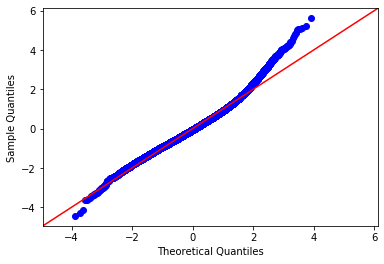

In [10]:
#check for the qq plot
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [11]:
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

In [12]:
#make X,y to put in the train test split
y=df.price
X=df.drop('price', axis=1)

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
print(len(X_train), len(X_test))

16593 4149


In [15]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

In [16]:
y_hat_test

array([653671.89385619,  87445.8063681 , 483672.30870456, ...,
       937569.15332482, 514399.61745128, 347044.66651326])

In [17]:
y_test

4680     600000.0
447       80000.0
15801    539000.0
9016     325000.0
2751     322000.0
           ...   
11259    412000.0
9946     554500.0
7828     875000.0
5148     335000.0
15189    455000.0
Name: price, Length: 4149, dtype: float64

In [18]:
#check for mean squared error
train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))


Train Mean Squared Error 20285327301.71478
Test Mean Squared Error 19684305810.40304
Root Train Mean Squared Error 142426.5681034082
Root Test Mean Squared Error 140300.76910125275


In [19]:
df.describe()

,price,sqft_living,floors,waterfront,view,grade,yr_built,bathr_0_75,bathr_1_0,bathr_1_25,...,bathr_5_25,bathr_5_5,bedr_2,bedr_3,bedr_4,bedr_5,cond_2,cond_3,cond_4,cond_5
count,2.074200e+04,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,...,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000
mean,4.871982e+05,1997.125108,1.480233,0.002989,0.184167,7.559396,1970.867949,0.003423,0.185566,0.000386,...,0.000193,0.000096,0.132292,0.465915,0.311494,0.066966,0.008148,0.649552,0.264391,0.076560
std,2.236077e+05,797.480005,0.536993,0.054592,0.666459,1.062901,29.202482,0.058408,0.388765,0.019636,...,0.013886,0.009819,0.338816,0.498849,0.463115,0.249968,0.089898,0.477122,0.441019,0.265898
min,7.800000e+04,370.000000,1.000000,0.000000,0.000000,3.000000,1900.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.170000e+05,1400.000000,1.000000,0.000000,0.000000,7.000000,1951.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+05,1870.000000,1.000000,0.000000,0.000000,7.000000,1974.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.125000e+05,2460.000000,2.000000,0.000000,0.000000,8.000000,1996.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.260000e+06,7480.000000,3.500000,1.000000,4.000000,12.000000,2015.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#on the second model R_squared is still low
#Root Mean Squared Error is high, about 140000
#QQ plot still has a head and tail oulliers
#Next step, get rid for the outliers

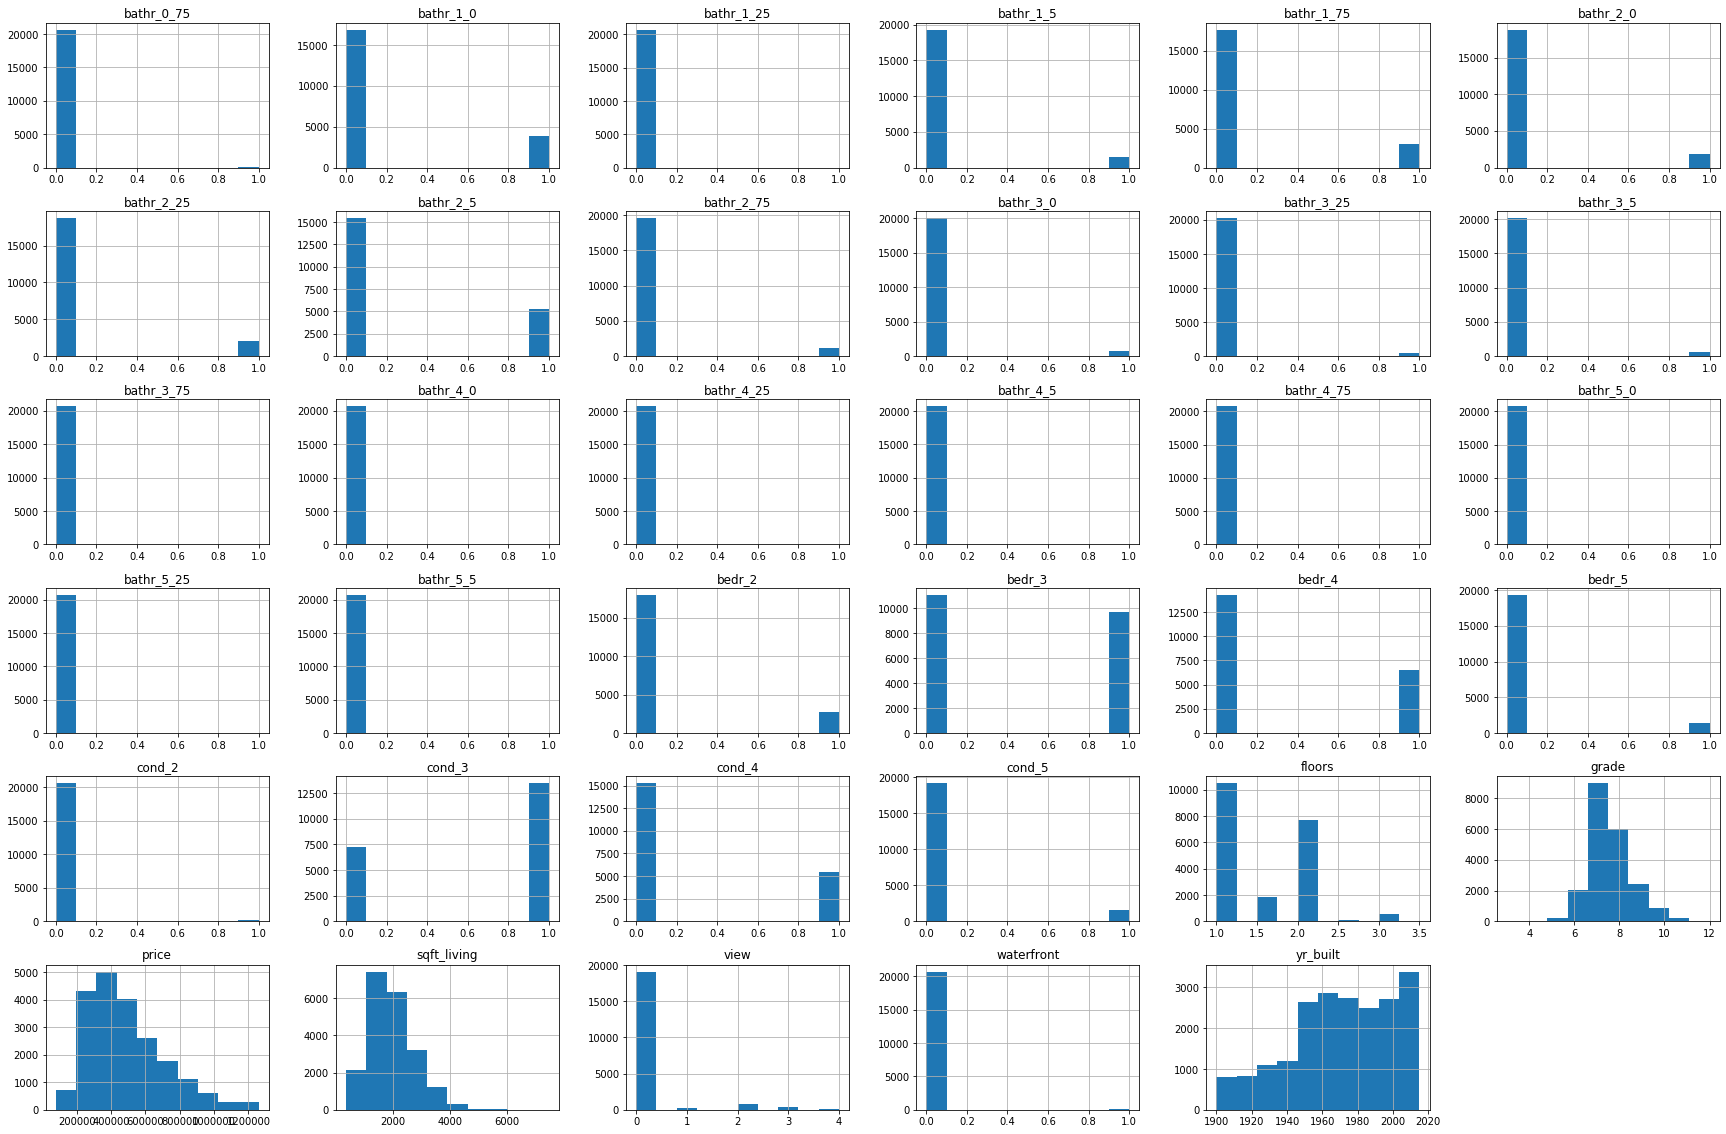

In [21]:
df.hist(figsize=(30,20))
plt.show()

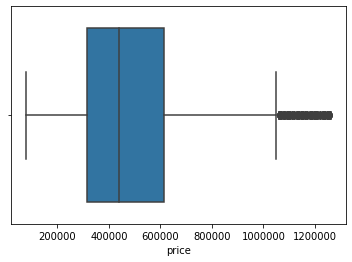

In [22]:
sns.boxplot(x=df['price'])

In [23]:
# calculate summary statistics
data_mean, data_std = np.mean(df.price), np.std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [24]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]


In [25]:
sorted(outliers)

[1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1160000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1170000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1180000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1190000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 1200000.0,
 120

In [26]:
df=df[df.price<1160000]

In [27]:
df.shape

(20513, 35)

In [28]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1038.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:29:17   Log-Likelihood:            -2.7176e+05
No. Observations:               20513   AIC:                         5.436e+05
Df Residuals:                   20485   BIC:                         5.438e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.356e+06   9.96e+04     43.725      0.000    4.16e+06    4.55e+06
sqft_living    83.0980      2.132     38.984      0.000      78.920      87.276
floors       3.788e+04   2322.439     16.310      0.000    3.33e+04    4.24e+04
waterfront   9.562e+04   1.96e+04      4.883      0.000    5.72e+04    1.34e+05
view          2.65e+04   1598.668     16.579      0.000    2.34e+04    2.96e+04
grade        1.022e+05   1444.208     70.742      0.000    9.93e+04    1.05e+05
yr_built    -2586.5168     45.669    -56.636      0.000   -2676.032   -2497.002
bathr_0_75    2.39e+05   4.89e+04      4.888      0.000    1.43e+05    3.35e+05
bathr_1_0    1.892e+05   4.61e+04      4.105      0.000    9.88e+04    2.79e+05
bathr_1_25    2.16e+05   6.93e+04      3.116      0.002    8.01e+04    3.52e+05
bathr_1_5    1.975e+05   4.61e+04      4.284      0.000    1.07e+05    2.88e+05
bathr_1_75   2.161e+05    4.6e+04      4.698      0.000    1.26e+05    3.06e+05
bathr_2_0    2.158e+05    4.6e+04      4.687      0.000    1.26e+05    3.06e+05
bathr_2_25   2.247e+05    4.6e+04      4.885      0.000    1.35e+05    3.15e+05
bathr_2_5    2.199e+05   4.59e+04      4.789      0.000     1.3e+05     3.1e+05
bathr_2_75   2.493e+05    4.6e+04      5.417      0.000    1.59e+05     3.4e+05
bathr_3_0    2.403e+05   4.61e+04      5.208      0.000     1.5e+05    3.31e+05
bathr_3_25   2.784e+05   4.63e+04      6.012      0.000    1.88e+05    3.69e+05
bathr_3_5    2.748e+05   4.62e+04      5.948      0.000    1.84e+05    3.65e+05
bathr_3_75   3.132e+05    4.8e+04      6.518      0.000    2.19e+05    4.07e+05
bathr_4_0    2.759e+05   4.84e+04      5.703      0.000    1.81e+05    3.71e+05
bathr_4_25   2.674e+05   5.18e+04      5.158      0.000    1.66e+05    3.69e+05
bathr_4_5    2.106e+05   4.96e+04      4.244      0.000    1.13e+05    3.08e+05
bathr_4_75   2.594e+05   7.66e+04      3.386      0.001    1.09e+05     4.1e+05
bathr_5_0    1.461e+05   6.68e+04      2.189      0.029    1.53e+04    2.77e+05
bathr_5_25   3.044e+05   8.25e+04      3.688      0.000    1.43e+05    4.66e+05
bedr_2       3.532e+04   3172.685     11.132      0.000    2.91e+04    4.15e+04
cond_5       3.984e+04   3759.679     10.596      0.000    3.25e+04    4.72e+04
==============================================================================
Omnibus:                      924.554   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.421
Skew:                           0.425   Prob(JB):                    1.16e-292
Kurtosis:                       3.922   Cond. No.                     6.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

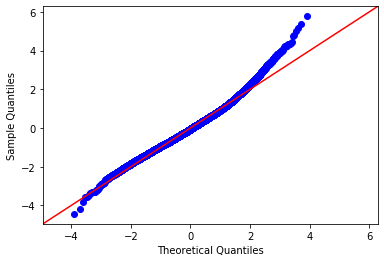

In [29]:
#check for the qq plot
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


In [30]:
train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))


Train Mean Squared Error 20285327301.71478
Test Mean Squared Error 19684305810.40304
Root Train Mean Squared Error 142426.5681034082
Root Test Mean Squared Error 140300.76910125275


In [31]:
df.shape

(20513, 35)

In [32]:
#after remove outliers the resutls seem not improve a lot
# next step, we will log_transform squared living

In [33]:
df.columns

Index(['price', 'sqft_living', 'floors', 'waterfront', 'view', 'grade',
       'yr_built', 'bathr_0_75', 'bathr_1_0', 'bathr_1_25', 'bathr_1_5',
       'bathr_1_75', 'bathr_2_0', 'bathr_2_25', 'bathr_2_5', 'bathr_2_75',
       'bathr_3_0', 'bathr_3_25', 'bathr_3_5', 'bathr_3_75', 'bathr_4_0',
       'bathr_4_25', 'bathr_4_5', 'bathr_4_75', 'bathr_5_0', 'bathr_5_25',
       'bathr_5_5', 'bedr_2', 'bedr_3', 'bedr_4', 'bedr_5', 'cond_2', 'cond_3',
       'cond_4', 'cond_5'],
      dtype='object')

In [34]:
df.sqft_living=np.log(df.sqft_living)

In [35]:
df

,price,sqft_living,floors,waterfront,view,grade,yr_built,bathr_0_75,bathr_1_0,bathr_1_25,...,bathr_5_25,bathr_5_5,bedr_2,bedr_3,bedr_4,bedr_5,cond_2,cond_3,cond_4,cond_5
0,221900.0,7.073270,1.0,0.0,0.0,7,1955,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,7.851661,2.0,0.0,0.0,7,1951,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,180000.0,6.646391,1.0,0.0,0.0,6,1933,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,604000.0,7.580700,1.0,0.0,0.0,7,1965,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,510000.0,7.426549,1.0,0.0,0.0,8,1987,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20737,360000.0,7.333023,3.0,0.0,0.0,8,2009,0,0,0,...,0,0,0,1,0,0,0,1,0,0
20738,400000.0,7.745003,2.0,0.0,0.0,8,2014,0,0,0,...,0,0,0,0,1,0,0,1,0,0
20739,402101.0,6.927558,2.0,0.0,0.0,7,2009,1,0,0,...,0,0,1,0,0,0,0,1,0,0
20740,400000.0,7.377759,2.0,0.0,0.0,8,2004,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [36]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     1025.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:29:36   Log-Likelihood:            -2.7184e+05
No. Observations:               20513   AIC:                         5.437e+05
Df Residuals:                   20485   BIC:                         5.440e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.328e+06   1.08e+05     30.702      0.000    3.12e+06    3.54e+06
sqft_living  1.604e+05   4364.755     36.754      0.000    1.52e+05    1.69e+05
floors        3.67e+04   2329.643     15.752      0.000    3.21e+04    4.13e+04
waterfront   8.919e+04   1.97e+04      4.538      0.000    5.07e+04    1.28e+05
view         2.728e+04   1603.780     17.011      0.000    2.41e+04    3.04e+04
grade        1.054e+05   1426.679     73.883      0.000    1.03e+05    1.08e+05
yr_built    -2567.3212     45.996    -55.816      0.000   -2657.478   -2477.165
bathr_0_75   2.046e+05    4.9e+04      4.174      0.000    1.09e+05    3.01e+05
bathr_1_0    1.256e+05   4.62e+04      2.721      0.007    3.51e+04    2.16e+05
bathr_1_25   1.418e+05   6.95e+04      2.039      0.041    5476.681    2.78e+05
bathr_1_5    1.206e+05   4.62e+04      2.613      0.009    3.01e+04    2.11e+05
bathr_1_75   1.351e+05   4.61e+04      2.931      0.003    4.47e+04    2.25e+05
bathr_2_0    1.355e+05   4.61e+04      2.937      0.003    4.51e+04    2.26e+05
bathr_2_25   1.429e+05   4.61e+04      3.100      0.002    5.26e+04    2.33e+05
bathr_2_5    1.403e+05    4.6e+04      3.047      0.002       5e+04     2.3e+05
bathr_2_75   1.738e+05   4.62e+04      3.765      0.000    8.33e+04    2.64e+05
bathr_3_0    1.667e+05   4.63e+04      3.601      0.000    7.59e+04    2.57e+05
bathr_3_25    2.15e+05   4.65e+04      4.627      0.000    1.24e+05    3.06e+05
bathr_3_5    2.137e+05   4.64e+04      4.609      0.000    1.23e+05    3.05e+05
bathr_3_75   2.619e+05   4.82e+04      5.429      0.000    1.67e+05    3.56e+05
bathr_4_0    2.322e+05   4.86e+04      4.781      0.000    1.37e+05    3.27e+05
bathr_4_25   2.402e+05   5.21e+04      4.614      0.000    1.38e+05    3.42e+05
bathr_4_5    1.754e+05   4.98e+04      3.519      0.000    7.77e+04    2.73e+05
bathr_4_75   2.468e+05   7.69e+04      3.208      0.001     9.6e+04    3.98e+05
bathr_5_0    1.108e+05    6.7e+04      1.653      0.098   -2.06e+04    2.42e+05
bathr_5_25   2.634e+05   8.29e+04      3.179      0.001    1.01e+05    4.26e+05
bedr_2        4.44e+04   3252.352     13.650      0.000     3.8e+04    5.08e+04
cond_5       4.031e+04   3774.261     10.681      0.000    3.29e+04    4.77e+04
==============================================================================
Omnibus:                      863.184   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1202.461
Skew:                           0.418   Prob(JB):                    7.74e-262
Kurtosis:                       3.841   Cond. No.                     4.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i